mackwell_1998_maryland_diabase
perple_x/output/mackwell_1998_maryland_diabase/mackwell_1998_maryland_diabase_1.txt
hacker_2015_md_xenolith
perple_x/output/hacker_2015_md_xenolith/hacker_2015_md_xenolith_1.txt
sammon_2021_lower_crust
perple_x/output/sammon_2021_lower_crust/sammon_2021_lower_crust_1.txt


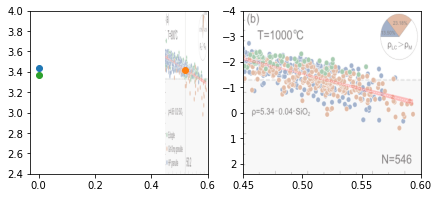

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from tcg_slb.phasediagram.scipy import ScipyPDReactiveODE
from tcg_slb.phasediagram.base import GPa2Bar

sys.path.append(os.path.join(os.path.pardir, 'tcg_slb_database','python'))

from python.tcg import x2c,phi2F,get_reaction,composition_to_label, custom_solve
from python.perplex import ppx_point_composition, ppx_profile_data

eps = 1.e-5 # default, 1.e-2

img_a = plt.imread("figs/li2022_8a.png")
img_b = plt.imread("figs/li2022_8b.png")

fig = plt.figure(figsize=(7,3))

ax1 = plt.subplot(1,2,1)
plt.imshow(img_a, extent=[.45, .60, 2.4, 4.0], aspect='auto', zorder=-1, alpha=0.5)

ax2 = plt.subplot(1,2,2)
plt.imshow(img_b, extent=[.45, .60, 2.4, -4.0], aspect='auto', zorder=-1, alpha=0.5)

rxn = get_reaction("eclogitization_2024_slb21_rx")
Tr = 5500.+273.15 
rxn.set_parameter("T0", Tr)

# TODO: finish this

for composition, sio2 in [("mackwell_1998_maryland_diabase", 0), ("hacker_2015_md_xenolith",0.521), ("sammon_2021_lower_crust",0)]:
    print(composition)
    Fi0, Xik0, phii0, cik0 = ppx_point_composition(rxn, composition)
    cik0 = x2c(rxn, Xik0) if cik0 is None else cik0
    Fi0 = phi2F(rxn, phii0, cik0, eps) if Fi0 is None else Fi0

    ode = ScipyPDReactiveODE(rxn)
    for T, P in [(900, 2.1)]:
        custom_solve(ode,T+273.15,GPa2Bar(P),Fi0,cik0,1,Da=1e6)
        rho = ode.final_rho()
        ax1.plot(sio2,rho/10.,'o')
